In [1]:
pip install CensusData

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 17.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for CensusData: filename=CensusData-1.15.post1-py3-none-any.whl size=28205746 sha256=9c5f682277052f13965567da1b2bd1070d34de84d7c913e2f5f9eacbd0aeb700
  Stored in directory: /users/jvbritt/.cache/pip/wheels/54/96/84/245773d5290c5bb024ff9c3d80fc5466eefed704b4136cfe85
Successfully built CensusData
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import censusdata
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline
%config InlineBackend.figure_format ='retina'

/lustre/work/client/users/jvbritt/.conda/envs/ds_1300/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [31]:
data2021 = censusdata.download('acs5', 2021, censusdata.censusgeo([('county', '*')]), 
                               # to get variable, add code to this list
                                   ['B01003_001E', 'B01001_002E', 'B01001_026E', 'B01002_001E', 'B01002_002E', 'B01002_003E', 
                                   'B02001_002E', 'B02001_003E', 'B02001_004E', 'B02001_005E', 'B02001_006E', 'B02001_009E', 'B20004_001E', 'B20004_002E', 'B20004_003E','B20004_004E', 'B20004_005E', 'B20004_006E'])

In [32]:
# B20004_001E is for median income by educational attainment

In [33]:
# to rename variable, add to dict
demographic_variables_dict = {'B01003_001E' : 'Total_Population', 'B01001_002E' : 'Total_Male_Pop', 
 'B01001_026E' : 'Total_Female_Pop', 'B01002_001E' : 'Median_Age', 
 'B01002_002E' : 'M_Median_Age' , 'B01002_003E' : 'F_Median_Age', 'B02001_002E' : 'Race_white', 
  'B02001_003E' : 'Race_black',  'B02001_004E' : 'Race_Am_Indian',   'B02001_005E' : 'Race_Asian', 'B02001_006E': 'Race_Pac_Isl', 'B20004_001E':'Median_Income', 'B20004_002E':'Less_High','B20004_003E':'High_Equiv','B20004_004E':'College_Assoc_Equiv','B20004_005E':'Bachelors','B20004_006E':'Grad_Prof'} 
data2021.rename(columns=demographic_variables_dict,
          inplace=True)
data2021

,Total_Population,Total_Male_Pop,Total_Female_Pop,Median_Age,M_Median_Age,F_Median_Age,Race_white,Race_black,Race_Am_Indian,Race_Asian,Race_Pac_Isl,B02001_009E,Median_Income,Less_High,High_Equiv,College_Assoc_Equiv,Bachelors,Grad_Prof
"Autauga County, Alabama: Summary level: 050, state:01> county:001",58239,28206,30033,38.5,37.9,39.2,43755,11470,98,647,0,858,42294,27025,32265,39813,53632,75256
"Baldwin County, Alabama: Summary level: 050, state:01> county:003",227131,110781,116350,43.4,42.0,44.6,192034,19895,1259,2175,9,2934,41716,28593,33315,36478,53222,66063
"Barbour County, Alabama: Summary level: 050, state:01> county:005",25259,13361,11898,40.2,38.9,42.6,11495,11985,77,106,1,236,30649,24844,27294,31025,51674,56505
"Bibb County, Alabama: Summary level: 050, state:01> county:007",22412,12300,10112,39.7,38.9,41.6,17020,5003,21,46,0,77,32759,31859,27239,33646,44441,65792
"Blount County, Alabama: Summary level: 050, state:01> county:009",58884,29530,29354,41.1,39.7,42.5,54439,760,189,216,74,808,40439,31292,33650,40818,52940,59850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Vega Baja Municipio, Puerto Rico: Summary level: 050, state:72> county:145",54544,26057,28487,43.1,41.5,44.6,30690,2409,50,9,0,12504,20674,11888,16611,19236,28046,34541
"Vieques Municipio, Puerto Rico: Summary level: 050, state:72> county:147",8317,4239,4078,43.6,40.9,45.9,2592,629,0,14,0,310,15751,15032,16496,11235,16692,-666666666
"Villalba Municipio, Puerto Rico: Summary level: 050, state:72> county:149",22341,10796,11545,42.0,40.7,42.9,10502,1784,0,0,0,3102,16780,8045,12674,16482,26082,38945
"Yabucoa Municipio, Puerto Rico: Summary level: 050, state:72> county:151",31047,15000,16047,44.9,43.7,46.0,3190,16119,0,11,0,530,17037,8743,15251,18441,19133,28393


In [34]:
data2021 = data2021.reset_index().rename(columns = {"index":"FIPS"})

In [35]:
f.params()[0][1] + f.params()[1][1]

NameError: name 'f' is not defined

In [36]:
data2021["FIPS"] = data2021["FIPS"].apply(lambda x: x.params()[0][1] + x.params()[1][1])
data2021

,FIPS,Total_Population,Total_Male_Pop,Total_Female_Pop,Median_Age,M_Median_Age,F_Median_Age,Race_white,Race_black,Race_Am_Indian,Race_Asian,Race_Pac_Isl,B02001_009E,Median_Income,Less_High,High_Equiv,College_Assoc_Equiv,Bachelors,Grad_Prof
0,01001,58239,28206,30033,38.5,37.9,39.2,43755,11470,98,647,0,858,42294,27025,32265,39813,53632,75256
1,01003,227131,110781,116350,43.4,42.0,44.6,192034,19895,1259,2175,9,2934,41716,28593,33315,36478,53222,66063
2,01005,25259,13361,11898,40.2,38.9,42.6,11495,11985,77,106,1,236,30649,24844,27294,31025,51674,56505
3,01007,22412,12300,10112,39.7,38.9,41.6,17020,5003,21,46,0,77,32759,31859,27239,33646,44441,65792
4,01009,58884,29530,29354,41.1,39.7,42.5,54439,760,189,216,74,808,40439,31292,33650,40818,52940,59850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,72145,54544,26057,28487,43.1,41.5,44.6,30690,2409,50,9,0,12504,20674,11888,16611,19236,28046,34541
3217,72147,8317,4239,4078,43.6,40.9,45.9,2592,629,0,14,0,310,15751,15032,16496,11235,16692,-666666666
3218,72149,22341,10796,11545,42.0,40.7,42.9,10502,1784,0,0,0,3102,16780,8045,12674,16482,26082,38945
3219,72151,31047,15000,16047,44.9,43.7,46.0,3190,16119,0,11,0,530,17037,8743,15251,18441,19133,28393


In [37]:
data2021

,FIPS,Total_Population,Total_Male_Pop,Total_Female_Pop,Median_Age,M_Median_Age,F_Median_Age,Race_white,Race_black,Race_Am_Indian,Race_Asian,Race_Pac_Isl,B02001_009E,Median_Income,Less_High,High_Equiv,College_Assoc_Equiv,Bachelors,Grad_Prof
0,01001,58239,28206,30033,38.5,37.9,39.2,43755,11470,98,647,0,858,42294,27025,32265,39813,53632,75256
1,01003,227131,110781,116350,43.4,42.0,44.6,192034,19895,1259,2175,9,2934,41716,28593,33315,36478,53222,66063
2,01005,25259,13361,11898,40.2,38.9,42.6,11495,11985,77,106,1,236,30649,24844,27294,31025,51674,56505
3,01007,22412,12300,10112,39.7,38.9,41.6,17020,5003,21,46,0,77,32759,31859,27239,33646,44441,65792
4,01009,58884,29530,29354,41.1,39.7,42.5,54439,760,189,216,74,808,40439,31292,33650,40818,52940,59850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,72145,54544,26057,28487,43.1,41.5,44.6,30690,2409,50,9,0,12504,20674,11888,16611,19236,28046,34541
3217,72147,8317,4239,4078,43.6,40.9,45.9,2592,629,0,14,0,310,15751,15032,16496,11235,16692,-666666666
3218,72149,22341,10796,11545,42.0,40.7,42.9,10502,1784,0,0,0,3102,16780,8045,12674,16482,26082,38945
3219,72151,31047,15000,16047,44.9,43.7,46.0,3190,16119,0,11,0,530,17037,8743,15251,18441,19133,28393


In [38]:
xwalk = pd.read_csv('cbsa2fipsxw.csv')

In [39]:
xwalk['FIPS'] = (xwalk['fipsstatecode'] * 1000) + xwalk['fipscountycode']

In [40]:
data2021['FIPS'] = data2021['FIPS'].astype(float)

In [41]:
new_data = data2021.merge(xwalk, on = 'FIPS', how = 'left')

In [42]:
new_data.columns

Index(['FIPS', 'Total_Population', 'Total_Male_Pop', 'Total_Female_Pop',
       'Median_Age', 'M_Median_Age', 'F_Median_Age', 'Race_white',
       'Race_black', 'Race_Am_Indian', 'Race_Asian', 'Race_Pac_Isl',
       'B02001_009E', 'Median_Income', 'Less_High', 'High_Equiv',
       'College_Assoc_Equiv', 'Bachelors', 'Grad_Prof', 'cbsacode',
       'metrodivisioncode', 'csacode', 'cbsatitle',
       'metropolitanmicropolitanstatis', 'metropolitandivisiontitle',
       'csatitle', 'countycountyequivalent', 'statename', 'fipsstatecode',
       'fipscountycode', 'centraloutlyingcounty'],
      dtype='object')

In [43]:
sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

In [44]:
statesShp = geopandas.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [45]:
xwalk = pd.read_pickle(dataFolder + "/xwalk_data_combined.pkl")
xwalk

,ctyname,bgrp,cbsa
0,"Rockingham County, NH",330150710012,14460
1,"Merrimack County, NH",330130380002,18180
2,"Merrimack County, NH",330130415001,18180
3,"Hillsborough County, NH",330110225011,31700
4,"Hillsborough County, NH",330110103022,31700
...,...,...,...
57404,"Elko County, NV",320079515003,21220
57405,"Elko County, NV",320079515003,21220
57406,"Elko County, NV",320079517002,21220
57407,"Elko County, NV",320079502001,21220


In [46]:
#Extract block group code
xwalk['fips'] = (xwalk['bgrp'] / 10**7).astype(int)
fipsToCbsa = xwalk.groupby('fips').first()['cbsa']
fipsToCbsa = dict(zip(fipsToCbsa.index, fipsToCbsa.values)) #Dict is faster for lookup

In [47]:
data2021['CBSA'] = data2021['FIPS'].apply(lambda c: fipsToCbsa.get(c, 99999))
data2021

,FIPS,Total_Population,Total_Male_Pop,Total_Female_Pop,Median_Age,M_Median_Age,F_Median_Age,Race_white,Race_black,Race_Am_Indian,Race_Asian,Race_Pac_Isl,B02001_009E,Median_Income,Less_High,High_Equiv,College_Assoc_Equiv,Bachelors,Grad_Prof,CBSA
0,1001.0,58239,28206,30033,38.5,37.9,39.2,43755,11470,98,647,0,858,42294,27025,32265,39813,53632,75256,33860
1,1003.0,227131,110781,116350,43.4,42.0,44.6,192034,19895,1259,2175,9,2934,41716,28593,33315,36478,53222,66063,19300
2,1005.0,25259,13361,11898,40.2,38.9,42.6,11495,11985,77,106,1,236,30649,24844,27294,31025,51674,56505,21640
3,1007.0,22412,12300,10112,39.7,38.9,41.6,17020,5003,21,46,0,77,32759,31859,27239,33646,44441,65792,13820
4,1009.0,58884,29530,29354,41.1,39.7,42.5,54439,760,189,216,74,808,40439,31292,33650,40818,52940,59850,13820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,72145.0,54544,26057,28487,43.1,41.5,44.6,30690,2409,50,9,0,12504,20674,11888,16611,19236,28046,34541,99999
3217,72147.0,8317,4239,4078,43.6,40.9,45.9,2592,629,0,14,0,310,15751,15032,16496,11235,16692,-666666666,99999
3218,72149.0,22341,10796,11545,42.0,40.7,42.9,10502,1784,0,0,0,3102,16780,8045,12674,16482,26082,38945,99999
3219,72151.0,31047,15000,16047,44.9,43.7,46.0,3190,16119,0,11,0,530,17037,8743,15251,18441,19133,28393,99999


In [48]:
group_county = data2021.groupby(by='CBSA').mean()

In [49]:
gdf = pd.read_pickle(sharedFolder + 'gdf2020.pkl')
gdf

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,inBuff,commuteBuffCount,workingPop,commutePercent,liminal
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",True,7146.0,66780.0,10.700809,False
1,10420,Metropolitan Statistical Area,701625,696225,697627,"Akron, OH","POLYGON ((-9060481.928 5063847.837, -9060475.5...",False,False,"POLYGON ((-9254365.317 5020257.954, -9254364.7...",True,86722.0,306288.0,28.313875,False
2,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",True,3686.0,50430.0,7.309141,False
3,10540,Metropolitan Statistical Area,128978,129948,130467,"Albany-Lebanon, OR","POLYGON ((-13720236.776 5551262.937, -13720393...",False,False,"POLYGON ((-13880404.968 5518947.795, -13880524...",True,6390.0,54728.0,11.675925,False
4,10580,Metropolitan Statistical Area,899748,905369,904617,"Albany-Schenectady-Troy, NY","POLYGON ((-8247992.807 5305256.748, -8248085.6...",False,False,"POLYGON ((-8472736.168 5278351.957, -8472566.1...",True,25289.0,390058.0,6.483395,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,49300,Micropolitan Statistical Area,116906,116129,116559,"Wooster, OH","POLYGON ((-9089178.853 5010653.858, -9088979.1...",False,False,"POLYGON ((-9303427.427 5003041.204, -9303435.5...",True,8380.0,48312.0,17.345587,False
922,49380,Micropolitan Statistical Area,22207,22047,21947,"Worthington, MN","POLYGON ((-10627927.538 5441934.306, -10627791...",False,True,"POLYGON ((-10853572.863 5404615.190, -10853573...",False,0.0,9763.0,0.000000,False
923,49460,Micropolitan Statistical Area,23282,23334,23373,"Yankton, SD","POLYGON ((-10855702.126 5337734.746, -10853435...",False,True,"POLYGON ((-11029881.460 5334892.015, -11029883...",False,0.0,10222.0,0.000000,False
924,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",True,10044.0,33194.0,30.258480,True


In [74]:
merge = pd.merge(gdf, group_county, on='CBSA', how='inner')
merge

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,...,Race_Am_Indian,Race_Asian,Race_Pac_Isl,B02001_009E,Median_Income,Less_High,High_Equiv,College_Assoc_Equiv,Bachelors,Grad_Prof
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,195.333333,1138.666667,20.00,2829.0,34969.0,23660.00,29209.0,35031.00,49804.333333,5.838933e+04
1,10420,Metropolitan Statistical Area,701625,696225,697627,"Akron, OH","POLYGON ((-9060481.928 5063847.837, -9060475.5...",False,False,"POLYGON ((-9254365.317 5020257.954, -9254364.7...",...,428.500000,11689.000000,69.50,3390.5,43425.5,26649.00,35121.5,39907.50,57434.500000,7.460550e+04
2,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",...,50.250000,557.500000,19.75,256.0,37369.5,24365.25,29814.0,36305.25,54842.750000,5.926025e+04
3,10540,Metropolitan Statistical Area,128978,129948,130467,"Albany-Lebanon, OR","POLYGON ((-13720236.776 5551262.937, -13720393...",False,False,"POLYGON ((-13880404.968 5518947.795, -13880524...",...,1096.000000,1253.000000,149.00,2213.0,41152.0,33284.00,33576.0,42705.00,50689.000000,5.613100e+04
4,10580,Metropolitan Statistical Area,899748,905369,904617,"Albany-Schenectady-Troy, NY","POLYGON ((-8247992.807 5305256.748, -8248085.6...",False,False,"POLYGON ((-8472736.168 5278351.957, -8472566.1...",...,260.200000,8197.400000,54.60,2915.2,50067.6,25116.40,37077.0,45458.20,61722.000000,7.653420e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,49300,Micropolitan Statistical Area,116906,116129,116559,"Wooster, OH","POLYGON ((-9089178.853 5010653.858, -9088979.1...",False,False,"POLYGON ((-9303427.427 5003041.204, -9303435.5...",...,112.000000,1272.000000,16.00,542.0,40268.0,38873.00,34467.0,38786.00,50801.000000,6.504800e+04
922,49380,Micropolitan Statistical Area,22207,22047,21947,"Worthington, MN","POLYGON ((-10627927.538 5441934.306, -10627791...",False,True,"POLYGON ((-10853572.863 5404615.190, -10853573...",...,294.000000,1199.000000,0.00,863.0,35771.0,33569.00,33013.0,39348.00,43767.000000,5.763900e+04
923,49460,Micropolitan Statistical Area,23282,23334,23373,"Yankton, SD","POLYGON ((-10855702.126 5337734.746, -10853435...",False,True,"POLYGON ((-11029881.460 5334892.015, -11029883...",...,834.000000,47.000000,0.00,630.0,41155.0,32778.00,32370.0,40975.00,51146.000000,6.050000e+04
924,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",...,79.000000,363.000000,0.00,348.0,37890.0,21319.00,31078.0,37028.00,57990.000000,6.269500e+04


In [78]:
merge = merge[(merge['Median_Income'] > 0) & (merge['liminal'])]
merge['Education_Pop'] = merge['Less_High'] + merge['High_Equiv'] + merge['College_Assoc_Equiv'] + merge['Bachelors'] + merge['Grad_Prof']
merge['Less_High_pct'] = merge['Less_High'] / merge['Education_Pop']
merge['High_Equiv_pct'] = merge['High_Equiv'] / merge['Education_Pop']
merge['College_Assoc_Equiv_pct'] = merge['College_Assoc_Equiv'] / merge['Education_Pop']
merge['Bachelors_pct'] = merge['Bachelors'] / merge['Education_Pop']
merge['Grad_Prof_pct'] = merge['Grad_Prof'] / merge['Education_Pop']

merge['Bach_and_Above_pct'] = (merge['Bachelors'] + merge['Grad_Prof']) / merge['Education_Pop']


/lustre/work/client/users/jvbritt/.conda/envs/ds_1300/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


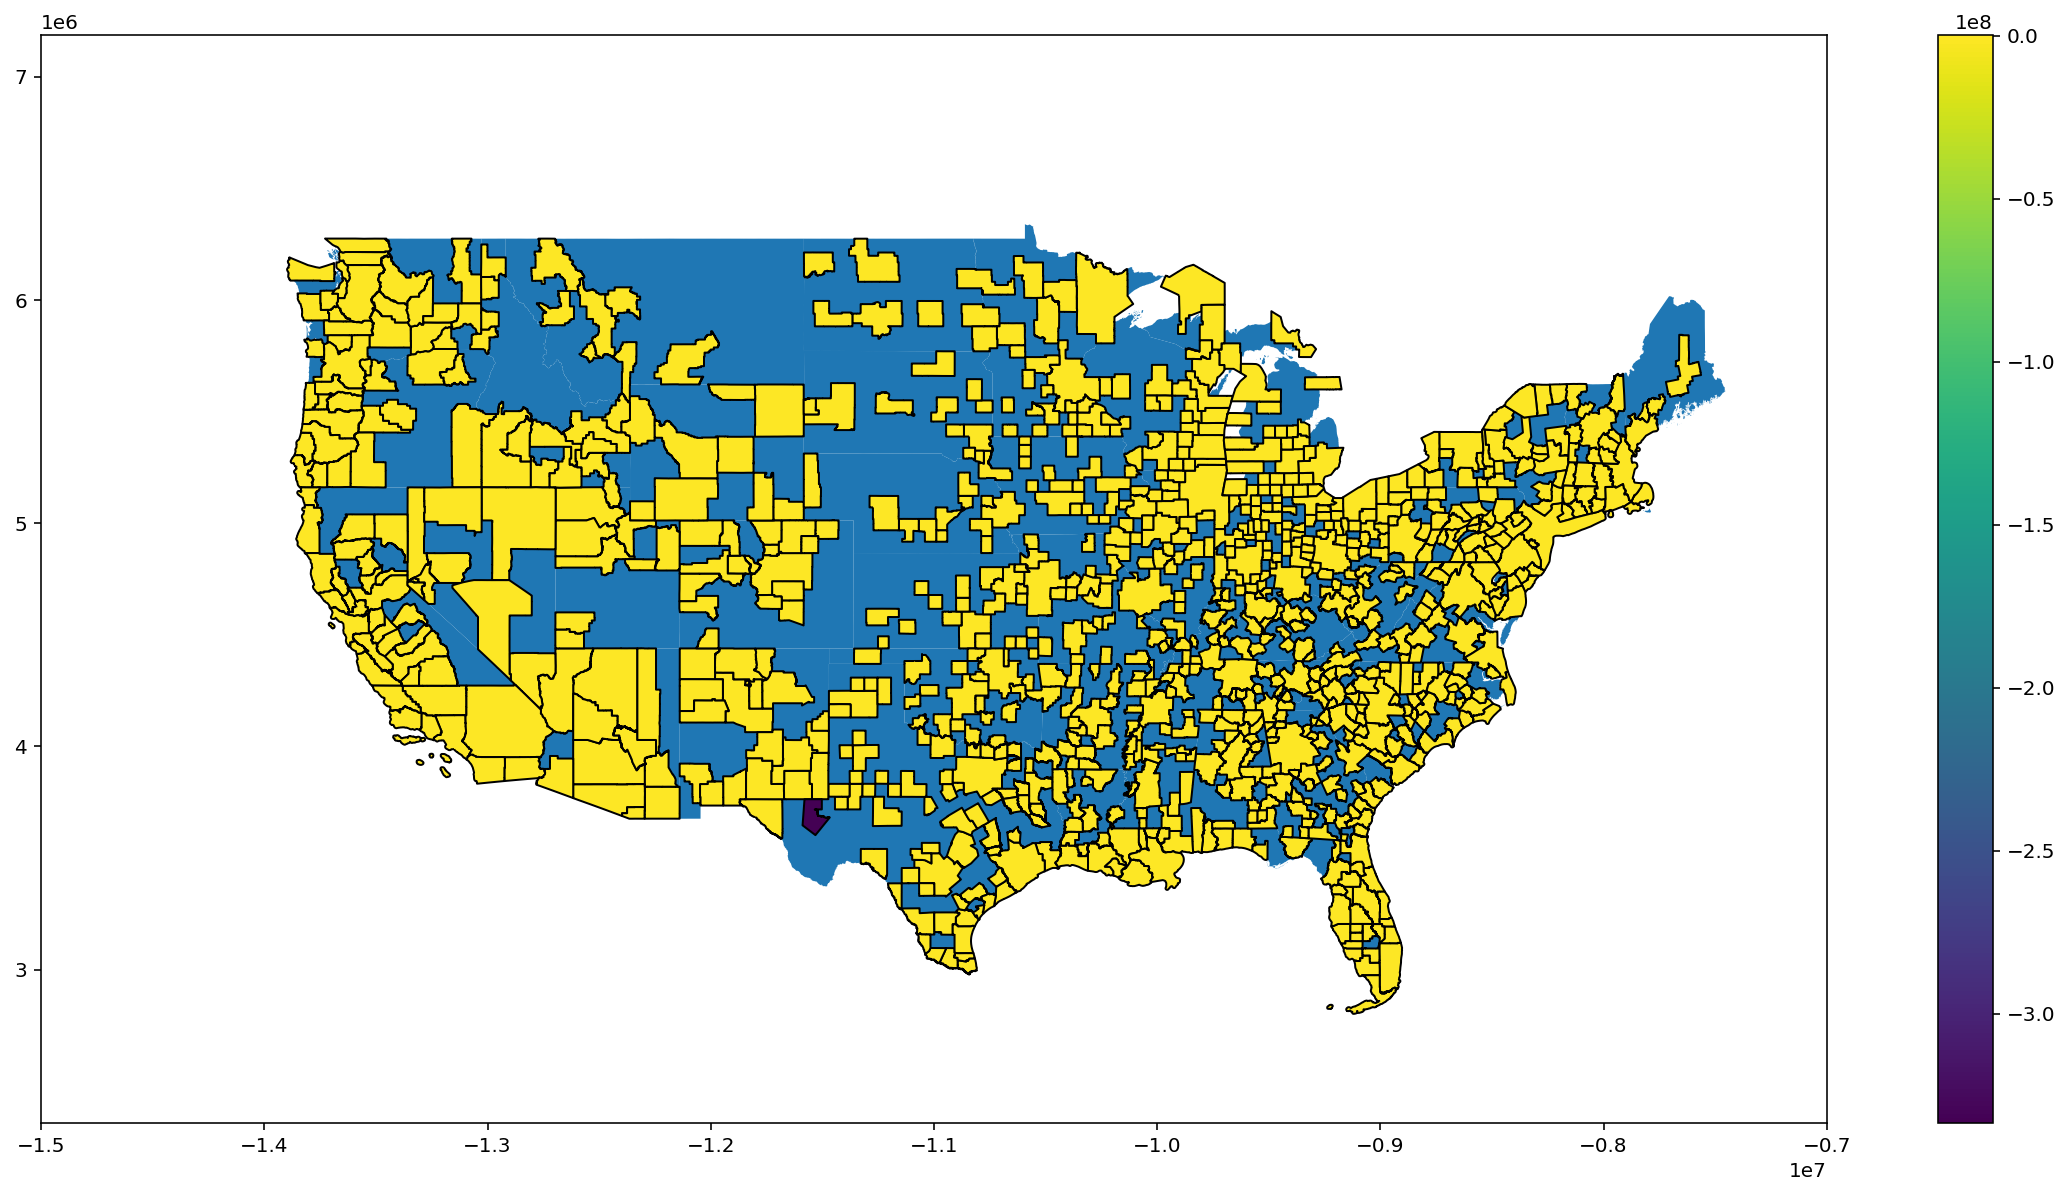

In [76]:
ax = plotUS()
merge.plot(ax=ax, column='Median_Income', edgecolor="black", linewidth=1, legend=True);

In [53]:
merge[merge['Median_Income'] > 47000]

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,...,Race_Am_Indian,Race_Asian,Race_Pac_Isl,B02001_009E,Median_Income,Less_High,High_Equiv,College_Assoc_Equiv,Bachelors,Grad_Prof
525,20660,Micropolitan Statistical Area,37481,37796,37932,"Easton, MD","POLYGON ((-8474309.183 4703990.989, -8474265.4...",False,True,"POLYGON ((-8668749.476 4640348.301, -8668865.0...",...,245.0,474.0,0.0,869.0,47406.0,32468.0,36486.0,41347.0,50769.0,95953.0
575,24060,Micropolitan Statistical Area,79146,79545,79147,"Glenwood Springs, CO","POLYGON ((-11959158.518 4774260.152, -11959172...",False,True,"POLYGON ((-12300482.034 4803170.290, -12300484...",...,183.5,478.5,36.5,2339.0,47331.0,28660.5,41686.5,44975.5,50918.5,70918.0
594,25720,Micropolitan Statistical Area,77545,79428,79655,"Heber, UT","POLYGON ((-12418053.061 4954885.603, -12418053...",False,True,"POLYGON ((-12589476.722 4976544.156, -12589648...",...,104.5,663.0,32.0,1084.0,49488.5,30157.0,36136.5,42152.0,59194.0,93596.0
755,36940,Micropolitan Statistical Area,37375,37409,37398,"Owatonna, MN","POLYGON ((-10384603.368 5495898.828, -10384232...",False,True,"POLYGON ((-10558901.892 5487627.393, -10558903...",...,36.0,151.0,25.0,579.0,47445.0,38367.0,38939.0,46444.0,57278.0,73250.0
853,44460,Micropolitan Statistical Area,24829,25056,25007,"Steamboat Springs, CO","POLYGON ((-11921056.818 4898808.088, -11921882...",False,True,"POLYGON ((-12121382.484 4911915.461, -12121383...",...,57.0,289.0,11.0,1410.0,48441.0,-666666666.0,42050.0,44195.0,49389.0,58977.0


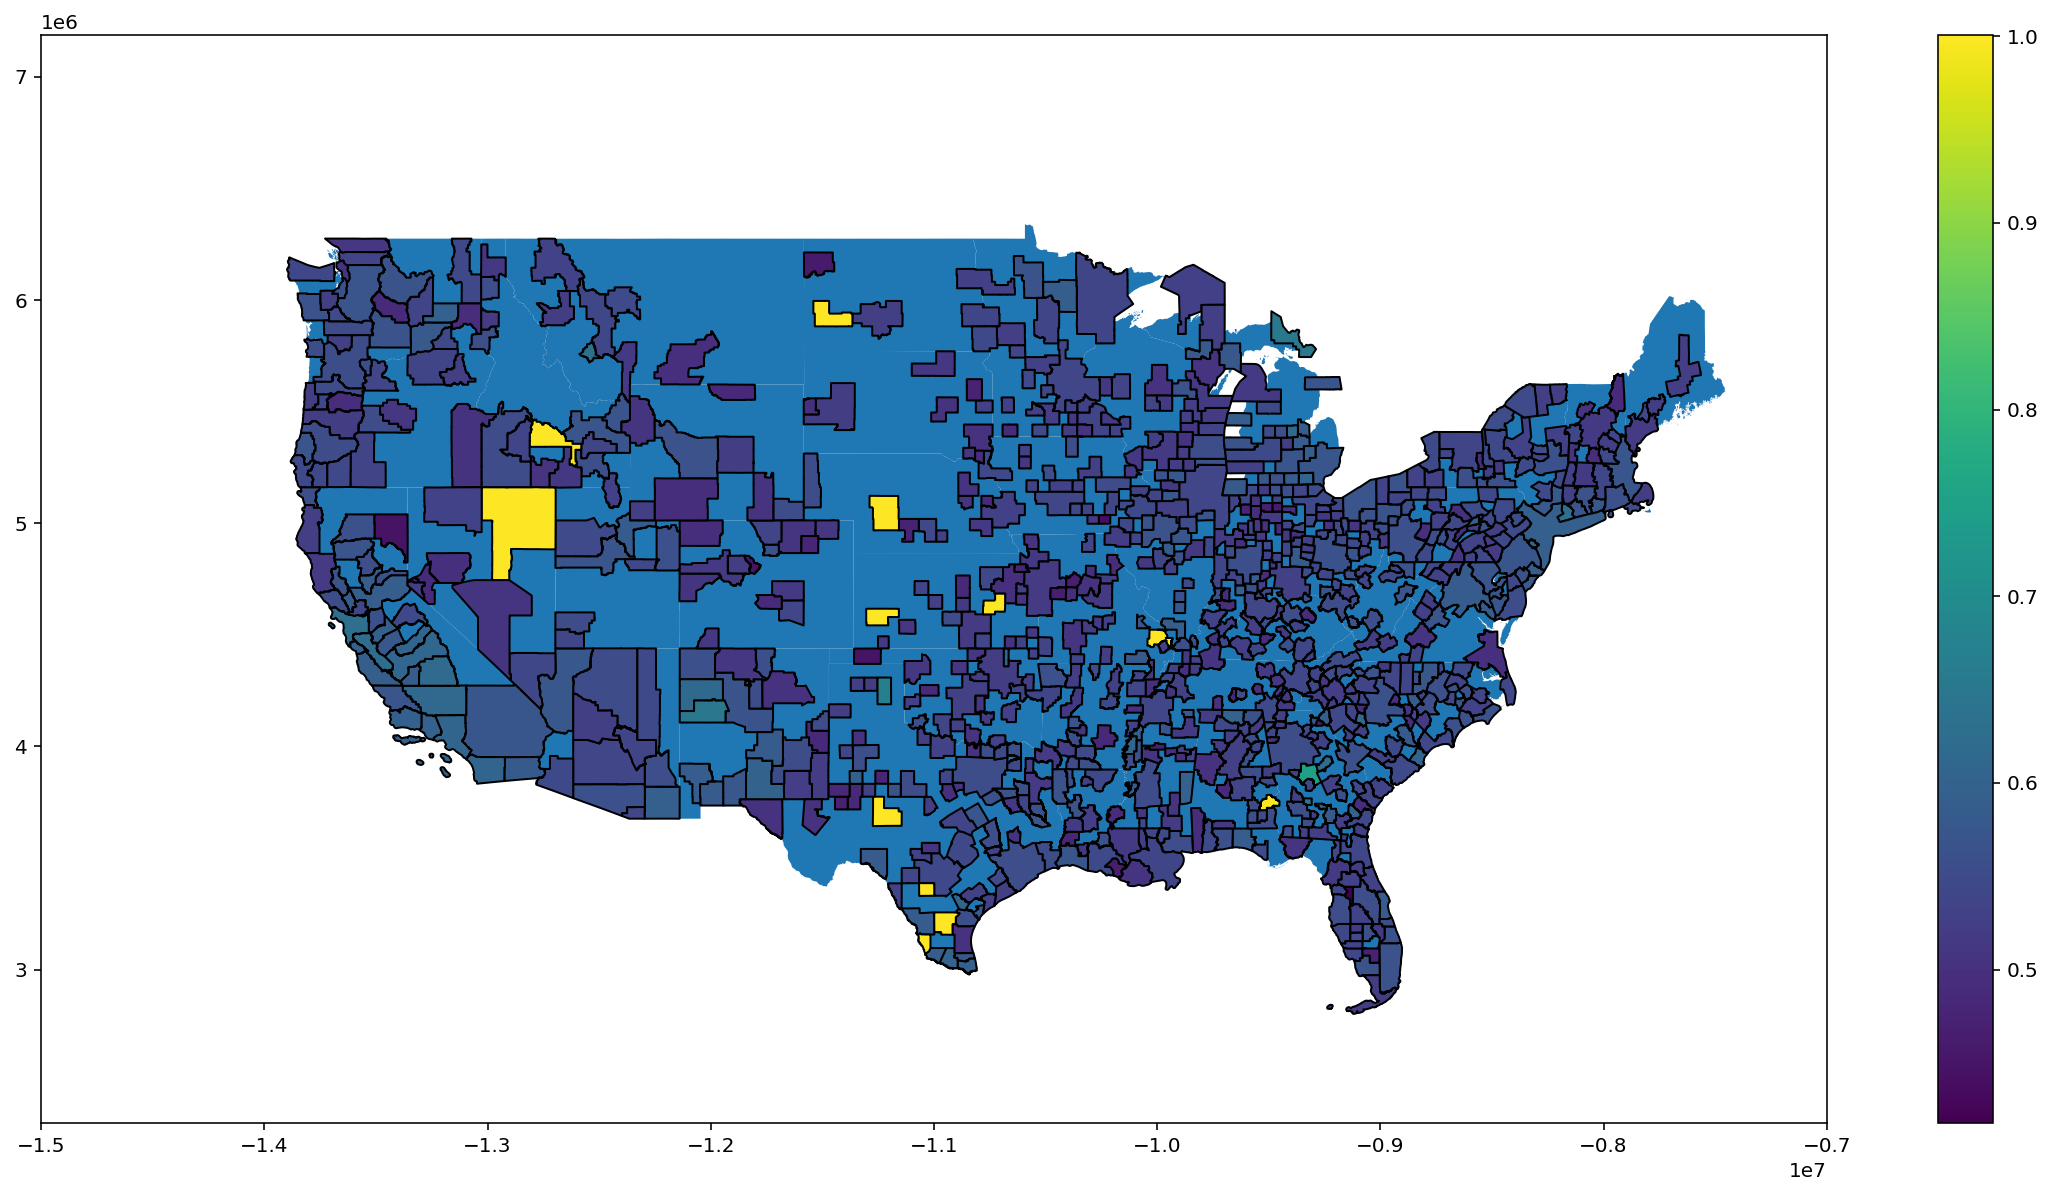

In [77]:
merge = merge[merge['Bach_and_Above_pct'] > 0]
ax = plotUS()
merge.plot(ax=ax, column='Bach_and_Above_pct', edgecolor="black", linewidth=1, legend=True);

In [62]:
merge[merge['Less_High'] > 52000]

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,...,Race_Am_Indian,Race_Asian,Race_Pac_Isl,B02001_009E,Median_Income,Less_High,High_Equiv,College_Assoc_Equiv,Bachelors,Grad_Prof
408,11860,Micropolitan Statistical Area,16318,16257,16108,"Atchison, KS","POLYGON ((-10638817.742 4798609.042, -10638817...",False,True,"POLYGON ((-10799751.719 4798695.008, -10799751...",...,31.0,103.0,0.0,274.0,35237.0,52755.0,29599.0,29330.0,49894.0,52700.0
665,31060,Micropolitan Statistical Area,19415,19340,19187,"Los Alamos, NM","POLYGON ((-11844352.948 4277011.862, -11844352...",False,True,"POLYGON ((-12004819.136 4304691.770, -12004411...",...,157.0,1043.0,0.0,888.0,83810.0,52546.0,53073.0,52500.0,84228.0,124426.0
790,39260,Micropolitan Statistical Area,24923,25753,26375,"Prineville, OR","POLYGON ((-13471275.437 5526045.608, -13471117...",False,True,"POLYGON ((-13642612.110 5515405.680, -13642621...",...,374.0,66.0,57.0,567.0,38356.0,56500.0,31086.0,38578.0,54792.0,76300.0
